<a href="https://colab.research.google.com/github/IcGrem/NN_for_NLP/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22fashion_mnist_prevent_overfitting_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ качества работы нейронной сети для распознавания моделей одежды в Keras

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

Учебный курс "[Программирование нейросетей на Python](https://www.asozykin.ru/courses/nnpython)".

In [223]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

## Подготовка данных для обучения сети

**Загружаем набор данных**

In [224]:
# В Keras встроены средства работы с популярными наборами данных
# (x_train, y_train) - набор данных для обучения
# (x_test, y_test) - набор данных для тестирования
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Список с названиями классов

In [225]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

Просматриваем примеры изображений

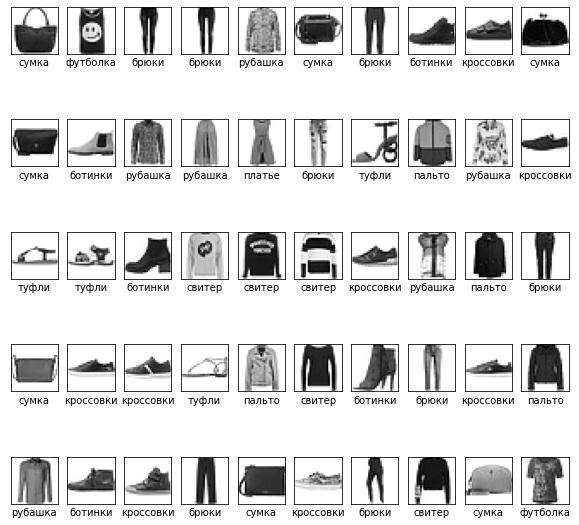

In [226]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

**Преобразование размерности данных в наборе**

In [227]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

**Нормализация данных**

In [228]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train / 255 
x_test = x_test / 255 

**Работа с правильными ответами**

In [229]:
n = 0

In [230]:
print(y_train[n])

9


**Преобразуем метки в формат one hot encoding**

In [231]:
y_train = utils.to_categorical(y_train, 10)

In [232]:
y_test = utils.to_categorical(y_test, 10)

**Правильный ответ в формате one hot encoding**

In [233]:
print(y_train[n])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Создаем нейронную сеть

**Создаем последовательную модель**

In [234]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dense(800, activation="relu"))
model.add(Dense(1200, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [235]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_21 (Dense)             (None, 800)               320800    
_________________________________________________________________
dense_22 (Dense)             (None, 1200)              961200    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                12010     
Total params: 1,608,010
Trainable params: 1,608,010
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

In [236]:
history = model.fit(x_train, y_train, 
                    batch_size=200, 
                    epochs=100,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/100
240/240 [==============================] - 1s 4ms/step - loss: 1.7422 - accuracy: 0.5130 - val_loss: 0.8577 - val_accuracy: 0.7177
Epoch 2/100
240/240 [==============================] - 1s 3ms/step - loss: 0.8100 - accuracy: 0.7322 - val_loss: 0.6737 - val_accuracy: 0.7719
Epoch 3/100
240/240 [==============================] - 1s 3ms/step - loss: 0.6598 - accuracy: 0.7794 - val_loss: 0.5963 - val_accuracy: 0.7997
Epoch 4/100
240/240 [==============================] - 1s 3ms/step - loss: 0.5812 - accuracy: 0.8023 - val_loss: 0.5646 - val_accuracy: 0.8023
Epoch 5/100
240/240 [==============================] - 1s 3ms/step - loss: 0.5399 - accuracy: 0.8160 - val_loss: 0.5345 - val_accuracy: 0.8094
Epoch 6/100
240/240 [==============================] - 1s 3ms/step - loss: 0.5125 - accuracy: 0.8261 - val_loss: 0.5020 - val_accuracy: 0.8255
Epoch 7/100
240/240 [==============================] - 1s 3ms/step - loss: 0.4881 - accuracy: 0.8301 - val_loss: 0.5002 - val_accuracy: 0.8242

## Сохраняем нейронную сеть для последующего использования

In [237]:
model.save('fashion_mnist_dense.h5')

## Оценка качества обучения

Проверка качества работы на наборе данных для тестирования

In [238]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3502 - accuracy: 0.8788


In [239]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 87.88


## Используем сеть для распознавания предметов одежды

In [240]:
n_rec = 480

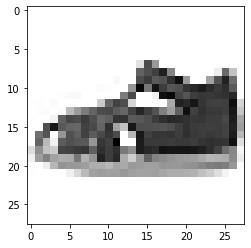

In [241]:
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

**Меняем размерность изображения и нормализуем его**

In [242]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [244]:
prediction = model.predict(x)

**Печатаем результаты распознавания**

In [245]:
prediction

array([[1.34346119e-05, 1.45022705e-06, 5.33103844e-07, 1.36922708e-07,
        6.20852973e-07, 8.94434452e-01, 4.28642998e-05, 1.02829695e-01,
        1.74495834e-03, 9.31839691e-04]], dtype=float32)

**Преобразуем результаты из формата one hot encoding**

In [246]:
prediction = np.argmax(prediction[0])
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])


Номер класса: 5
Название класса: туфли


**Печатаем правильный ответ**

In [247]:
label = np.argmax(y_test[0])
print("Номер класса:", label)
print("Название класса:", classes[label])

Номер класса: 9
Название класса: ботинки


## Загружаем свою картинку

In [215]:
files.upload()

Saving кросс1.jpg to кросс1.jpg


{'кросс1.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc0\x00\x11\x08\x07\xd0\x07\xd0\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x01\x00\x03\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\xff\xc4\x00G\x10\x00\x02\x02\x01\x03\x02\x04\x05\x02\x04\x05\x04\x01\x02\x00\x0f\x00\x01\x02\x11\x03\x04!1\x12A\x05Qaq\x06\x13"\x81\x912\xa1\x14B\xb1\xc1\x07#R\xd1\xf0\x153b\xe1\xf1$Cr\x16S\x084\x82\x92\xa2\x175s\xb2\xd2Ec\xff\xc4\x00\x1b\x01\x01\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x05\x04\x06\x07\xff\xc4\x005\x11\x01\x01\x00\x02\x01\x03\x02\x03\x07\x04\x02\x02\

Проверяем загрузку картинки

In [248]:
!ls

 fashion_mnist_dense.h5  'кросс (1).jpg'   кросс.jpg	    сумка.jpg
 sample_data		  кросс1.jpg	  'сумка (1).jpg'


Загружаем картинку из файла

In [249]:
img_path = 'кросс1.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

Показываем картинку

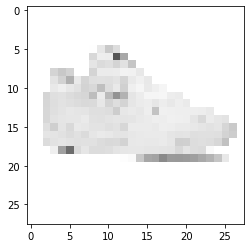

In [250]:
plt.imshow(img.convert('RGBA'))
plt.show()

Преобразуем картинку для обработки нейронной сетью

In [251]:
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255

Запускаем распознавание

In [252]:
prediction = model.predict(x)

Результаты распознавания

In [253]:
prediction

array([[0.08217047, 0.02809474, 0.11041915, 0.3783223 , 0.05393288,
        0.03053465, 0.14018632, 0.07834985, 0.09650387, 0.00148579]],
      dtype=float32)

In [254]:
prediction = np.argmax(prediction)
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

Номер класса: 3
Название класса: платье


## Идеи по изменению архитектуры нейронной сети

1. Попробуйте использовать разное количество нейронов на входном слое: 400, 600, 800, 1200.
2. Добавьте в нейронную сеть скрытый слой с разным количеством нейронов: 200, 300, 400, 600, 800.
3. Добавьте несколько скрытых слоев в сеть с разным количеством нейронов в каждом слое.
3. Используйте разное количество эпох: 10, 15, 20, 25, 30.
4. Используйте разные размеры мини-выборки (batch_size): 10, 50, 100, 200, 500.
 

Подберить разные комбинации гиперпараметров таким образом, чтобы получить лучший результат на тестовом наборе данных.

Убедитесь, что в вашей модели нет переобучения.